In [1]:
import pandas as pd
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
folder_path = "./modis_data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
combined_df = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in csv_files], ignore_index=True)
combined_df.to_csv("./modis_data/combined_data.csv", index=False)
print("CSV-файлы успешно объединены.")

CSV-файлы успешно объединены.


In [77]:
df = pd.read_csv('./modis_data/combined_data.csv')

In [78]:
df = df[(df.confidence==100)&(df.type==0)]

In [76]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,59.0355,-114.5688,362.0,1.8,1.3,2023-07-15,404,Terra,MODIS,100,61.03,287.3,224.3,N,0
1,51.8204,80.7694,327.2,4.2,1.9,2023-06-20,1455,Terra,MODIS,100,61.03,288.8,209.9,N,0
2,-4.7206,-46.3885,380.9,1.4,1.2,2023-10-03,55,Terra,MODIS,100,61.03,302.4,242.2,N,0
3,64.3550,-145.7107,411.4,1.0,1.0,2023-08-02,2234,Aqua,MODIS,100,61.03,307.0,336.8,D,0
4,58.6878,-120.5900,350.2,2.7,1.6,2023-09-23,954,Aqua,MODIS,100,61.03,278.6,260.2,N,0


In [79]:
len(df)

333308

In [80]:
df = df.sample(n=5000, random_state=0).reset_index(drop=True)

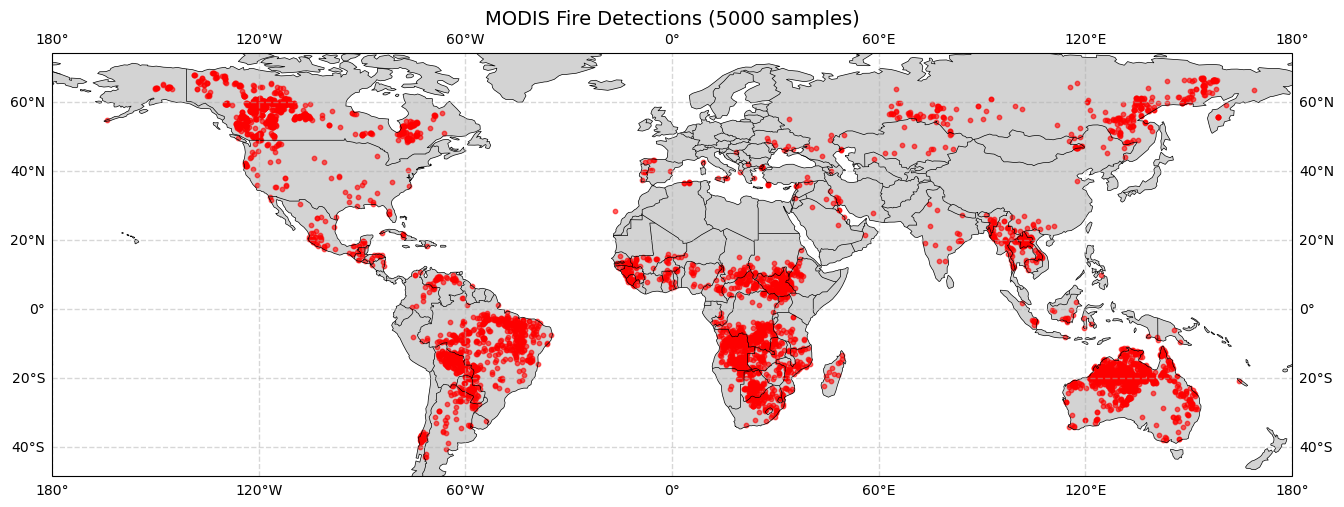

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(16, 9))
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.scatter(gdf["longitude"], gdf["latitude"], color='red', s=10, transform=ccrs.PlateCarree(), alpha=0.6)
ax.gridlines(draw_labels=True, linewidth=1, linestyle='--', alpha=0.5)
plt.title("MODIS Fire Detections (5000 samples)", fontsize=14)
plt.show()

In [214]:
df = pd.read_csv('wildlands.txt', sep='^')

C:\Users\alex1\AppData\Local\Temp\ipykernel_6620\3020946314.py:1: DtypeWarning: Columns (2,13,27,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wildlands.txt', sep='^')


In [215]:
df.head()

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,LATITUDE,LONGITUDE,TOWNSHIP,...,GENDER,AGE,ACTIVITY_W,HORIZ_DIS,TYPE_ROW,ELEVATION,POS_SLOPE,ASPECT,FLAME_LGTH,SPREAD_RAT
0,AK_11100_05062023_232897_0,AK,11100,5062023,232897,0,5.0,58.39,134.59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK_11100_05172023_233143_0,AK,11100,5172023,233143,0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK_11100_05272023_233404_0,AK,11100,5272023,233404,0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK_12100_09032023_9030013_0,AK,12100,9032023,9030013,0,5.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,20.0,1.0,8.0,0.0,0.0
4,AK_19705_03292023_23009_0,AK,19705,3292023,23009,0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95920 entries, 0 to 95919
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INCIDENT_KEY  95920 non-null  object 
 1   STATE         95920 non-null  object 
 2   FDID          95920 non-null  object 
 3   INC_DATE      95920 non-null  int64  
 4   INC_NO        95920 non-null  int64  
 5   EXP_NO        95920 non-null  int64  
 6   VERSION       95920 non-null  float64
 7   LATITUDE      12475 non-null  float64
 8   LONGITUDE     12472 non-null  float64
 9   TOWNSHIP      500 non-null    float64
 10  NORTH_SOU     500 non-null    object 
 11  RANGE         500 non-null    float64
 12  EAST_WEST     500 non-null    object 
 13  SECTION       499 non-null    object 
 14  SUBSECTION    499 non-null    object 
 15  MERIDIAN      498 non-null    object 
 16  AREA_TYPE     95809 non-null  float64
 17  FIRE_CAUSE    95809 non-null  object 
 18  HUM_FACT1     72510 non-nu

In [217]:
df = df[df['DANGR_RATE'].notna()]

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5608 entries, 3 to 95869
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INCIDENT_KEY  5608 non-null   object 
 1   STATE         5608 non-null   object 
 2   FDID          5608 non-null   object 
 3   INC_DATE      5608 non-null   int64  
 4   INC_NO        5608 non-null   int64  
 5   EXP_NO        5608 non-null   int64  
 6   VERSION       5608 non-null   float64
 7   LATITUDE      795 non-null    float64
 8   LONGITUDE     795 non-null    float64
 9   TOWNSHIP      61 non-null     float64
 10  NORTH_SOU     61 non-null     object 
 11  RANGE         61 non-null     float64
 12  EAST_WEST     61 non-null     object 
 13  SECTION       61 non-null     object 
 14  SUBSECTION    61 non-null     object 
 15  MERIDIAN      61 non-null     object 
 16  AREA_TYPE     5608 non-null   float64
 17  FIRE_CAUSE    5608 non-null   object 
 18  HUM_FACT1     4514 non-null   ob

In [219]:
df = df.loc[:, df.isna().mean() <= 0.3]

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 105 to 95542
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INCIDENT_KEY  1995 non-null   object 
 1   STATE         1995 non-null   object 
 2   FDID          1995 non-null   object 
 3   INC_DATE      1995 non-null   int64  
 4   INC_NO        1995 non-null   int64  
 5   AREA_TYPE     1995 non-null   float64
 6   FIRE_CAUSE    1995 non-null   int64  
 7   HEAT_SOURC    1995 non-null   int64  
 8   WEATH_TYPE    1995 non-null   float64
 9   WIND_SPEED    1995 non-null   float64
 10  AIR_TEMP      1995 non-null   float64
 11  REL_HUMID     1995 non-null   float64
 12  DANGR_RATE    1995 non-null   int64  
 13  ACRES_BURN    1995 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 233.8+ KB


In [221]:
columns_to_keep = [
    'INCIDENT_KEY', 'STATE', 'FDID', 'INC_DATE', 'INC_NO',
    'AREA_TYPE', 'FIRE_CAUSE', 'HEAT_SOURC', 'WEATH_TYPE',
    'WIND_SPEED', 'AIR_TEMP', 'REL_HUMID', 'DANGR_RATE', 'ACRES_BURN'
]

df = df[columns_to_keep]

In [286]:
df.head()

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,AREA_TYPE,FIRE_CAUSE,HEAT_SOURC,WEATH_TYPE,WIND_SPEED,AIR_TEMP,REL_HUMID,DANGR_RATE,ACRES_BURN
105,AK_28100_04022023_2304089_0,AK,28100,4022023,2304089,3.0,3,61,10.0,6.0,35.0,48.0,1,1.00
131,AK_31350_08042023_23296_0,AK,31350,8042023,23296,4.0,8,80,10.0,2.0,78.0,44.0,3,0.25
542,AL_00501_01112023_67_0,AL,501,1112023,67,3.0,5,43,11.0,10.0,70.0,50.0,2,2.00
632,AL_00802_10092023_1000311_0,AL,802,10092023,1000311,3.0,5,43,10.0,15.0,78.0,20.0,4,16.00
913,AL_02404_09092023_07065_0,AL,2404,9092023,7065,4.0,3,43,11.0,9.0,96.0,37.0,2,0.10


In [248]:
len(df)

1995

In [251]:
df['DANGR_RATE'].value_counts()

DANGR_RATE
2    718
1    707
3    394
4    106
5     70
Name: count, dtype: int64

In [236]:
df = df[df['DANGR_RATE'].str.strip() != 'U']
df = df[df['FIRE_CAUSE'].str.strip() != 'U']
df = df[df['HEAT_SOURC'].str.strip() != 'UU']

In [247]:
df = df.dropna(subset=['WEATH_TYPE', 'WIND_SPEED', 'AIR_TEMP', 'REL_HUMID'])

In [252]:
cols_to_convert = ['FIRE_CAUSE', 'HEAT_SOURC', 'DANGR_RATE']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [253]:
df.isnull().sum()

INCIDENT_KEY    0
STATE           0
FDID            0
INC_DATE        0
INC_NO          0
AREA_TYPE       0
FIRE_CAUSE      0
HEAT_SOURC      0
WEATH_TYPE      0
WIND_SPEED      0
AIR_TEMP        0
REL_HUMID       0
DANGR_RATE      0
ACRES_BURN      0
dtype: int64

In [75]:
data.to_csv('fire_info.csv', index=False)

In [2]:
model = YOLO('yolo_n.pt')

In [3]:
model.val(data='./data1/data.yaml')

Ultralytics 8.3.146  Python-3.12.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i7-11700F 2.50GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 38.010.5 MB/s, size: 19.9 KB)


val: Scanning C:\Users\alex1\python_projects\bachelor_project\data1\valid\labels.cache... 1313 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1313/1313 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [01:04<00:00,  1.29it/s]


                   all       1313       8528      0.432      0.593       0.41      0.216
Speed: 0.8ms preprocess, 42.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000029D70924170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [262]:
model1 = YOLO('yolo_s.pt')

In [263]:
model1.val(data='./data1/data.yaml')

Ultralytics 8.3.146  Python-3.12.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i7-11700F 2.50GHz)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 135.549.7 MB/s, size: 18.5 KB)


val: Scanning C:\Users\alex1\python_projects\bachelor_project\data1\valid\labels.cache... 1313 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1313/1313 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [02:12<00:00,  1.59s/it]


                   all       1313       8528      0.436      0.617      0.427      0.236
Speed: 0.8ms preprocess, 95.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000267C673B1A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [2]:
model2 = YOLO('yolo_m.pt')

In [62]:
model2.val(data='./data1/data.yaml', conf=0.4)

Ultralytics 8.3.146  Python-3.12.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i7-11700F 2.50GHz)
val: Fast image access  (ping: 0.00.0 ms, read: 246.5108.6 MB/s, size: 24.9 KB)


val: Scanning C:\Users\alex1\python_projects\bachelor_project\data1\valid\labels.cache... 1313 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1313/1313 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:58<00:00,  1.41it/s]


                   all       1313       8528      0.506      0.359      0.361      0.222
Speed: 0.8ms preprocess, 39.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000029D6EC1F020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [4]:
image_path = './satellite_imgs_upd/101.png'
results = model2(image_path, conf=0.1)
results[0].show()


image 1/1 C:\Users\alex1\python_projects\bachelor_project\satellite_imgs_upd\101.png: 640x640 17 fires, 55.3ms
Speed: 3.0ms preprocess, 55.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


   confidence class   x1   y1   x2   y2
0    0.610486  fire  261  179  297  212
1    0.530708  fire  193  342  230  379
2    0.449918  fire  411  235  445  267
3    0.382032  fire  209  142  241  172
4    0.317370  fire  229  129  261  158
5    0.282840  fire  253  154  283  183
6    0.131737  fire  196  192  230  224
7    0.128928  fire  165  206  198  240


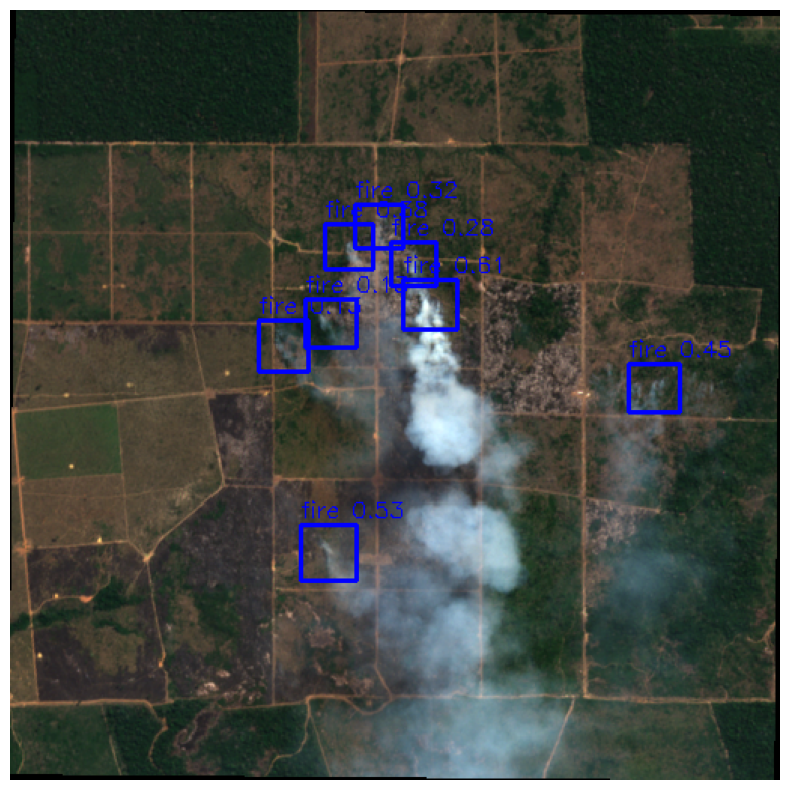

In [9]:
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    if inter_area == 0:
        return 0.0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter_area / float(box1_area + box2_area - inter_area)

# Настройки
image_path = "./satellite_imgs_upd/101.png"
model = YOLO("yolo_m.pt")
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

# Загрузка изображения
image = cv2.imread(image_path)

display_img = image.copy()
confirmed_boxes = []
log = []

for conf_thresh in thresholds:
    result = model.predict(image, conf=conf_thresh, verbose=False)[0]
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        new_box = (x1, y1, x2, y2)

        # Центр новой рамки
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2

        overlaps = []
        for cb in confirmed_boxes:
            existing = cb["box"]
            iou_cond = compute_iou(new_box, existing) > 0.5
            center_inside_cond = (existing[0] <= center_x <= existing[2]) and (existing[1] <= center_y <= existing[3])
            overlaps.append(iou_cond or center_inside_cond)

        if any(overlaps):
            continue

        cls = model.names[int(box.cls)]
        conf = float(box.conf)

        confirmed_boxes.append({"box": new_box})
        log.append({
            "confidence": conf,
            "class": cls,
            "x1": x1, "y1": y1, "x2": x2, "y2": y2
        })

        label = f"{cls} {conf:.2f}"
        cv2.rectangle(display_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(display_img, label, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

df = pd.DataFrame(log)
print(df)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

   confidence class   x1   y1   x2   y2
0    0.610486  fire  261  179  297  212
1    0.530708  fire  193  342  230  379
2    0.449918  fire  411  235  445  267
3    0.382032  fire  209  142  241  172
4    0.317370  fire  229  129  261  158
5    0.282840  fire  253  154  283  183
6    0.131737  fire  196  192  230  224
7    0.128928  fire  165  206  198  240


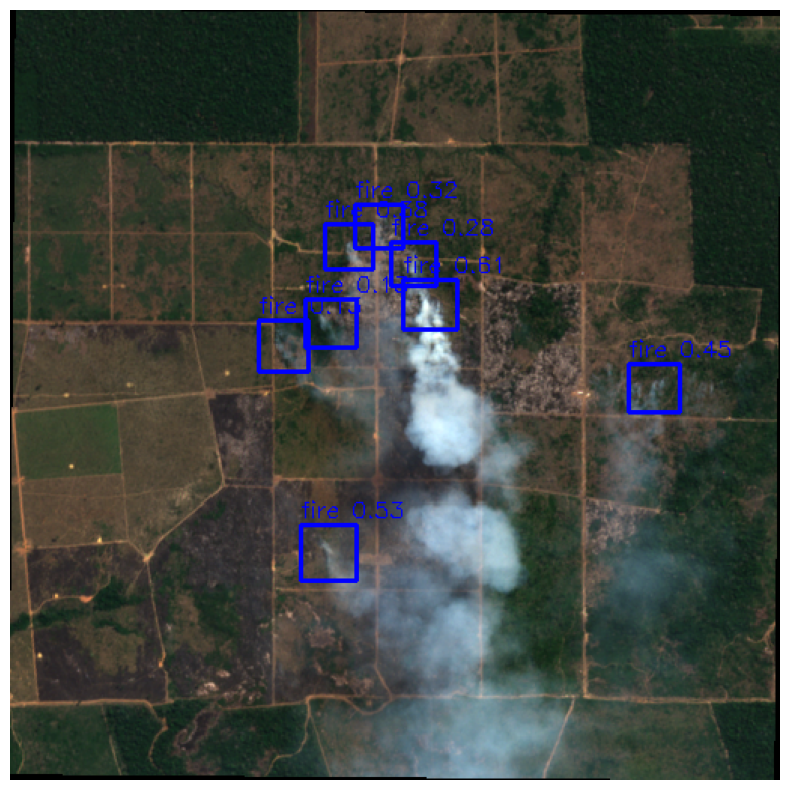

In [96]:
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    if inter_area == 0:
        return 0.0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter_area / float(box1_area + box2_area - inter_area)

# Настройки
image_path = "./satellite_imgs_upd/101.png"
model = YOLO("yolo_m.pt")
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

# Загрузка изображения
image = cv2.imread(image_path)

display_img = image.copy()
confirmed_boxes = []
log = []

for conf_thresh in thresholds:
    result = model.predict(image, conf=conf_thresh, verbose=False)[0]
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        new_box = (x1, y1, x2, y2)

        # Центр новой рамки
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2

        # Проверка: если центр новой рамки внутри одной из уже подтверждённых
        center_inside_existing = any(
            existing[0] <= center_x <= existing[2] and existing[1] <= center_y <= existing[3]
            for existing in [cb["box"] for cb in confirmed_boxes]
        )

        if center_inside_existing:
            continue

        cls = model.names[int(box.cls)]
        conf = float(box.conf)

        confirmed_boxes.append({"box": new_box})
        log.append({
            "confidence": conf,
            "class": cls,
            "x1": x1, "y1": y1, "x2": x2, "y2": y2
        })

        label = f"{cls} {conf:.2f}"
        cv2.rectangle(display_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(display_img, label, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

df = pd.DataFrame(log)
print(df)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("fire_info.csv")

In [68]:
data.head()

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,AREA_TYPE,FIRE_CAUSE,HEAT_SOURC,WEATH_TYPE,WIND_SPEED,AIR_TEMP,REL_HUMID,DANGR_RATE,ACRES_BURN
0,AK_28100_04022023_2304089_0,AK,28100,4022023,2304089,3.0,3,61,10.0,6.0,35.0,48.0,1,1.00
1,AK_31350_08042023_23296_0,AK,31350,8042023,23296,4.0,8,80,10.0,2.0,78.0,44.0,3,0.25
2,AL_00501_01112023_67_0,AL,501,1112023,67,3.0,5,43,11.0,10.0,70.0,50.0,2,2.00
3,AL_00802_10092023_1000311_0,AL,802,10092023,1000311,3.0,5,43,10.0,15.0,78.0,20.0,4,16.00
4,AL_02404_09092023_07065_0,AL,2404,9092023,7065,4.0,3,43,11.0,9.0,96.0,37.0,2,0.10


In [73]:
data = data.drop(columns=["INC_NO"])

In [74]:
data.corr()

,INC_DATE,AREA_TYPE,FIRE_CAUSE,HEAT_SOURC,WEATH_TYPE,WIND_SPEED,AIR_TEMP,REL_HUMID,DANGR_RATE,ACRES_BURN
INC_DATE,1.000000,0.033085,-0.076547,-0.077192,0.031164,-0.146416,0.095601,0.034353,0.043236,-0.052446
AREA_TYPE,0.033085,1.000000,0.060292,-0.035974,-0.034357,-0.068028,-0.045843,0.016746,-0.025824,-0.046396
FIRE_CAUSE,-0.076547,0.060292,1.000000,0.332094,-0.060671,-0.021394,-0.077046,0.062748,-0.075614,-0.045586
HEAT_SOURC,-0.077192,-0.035974,0.332094,1.000000,0.123079,0.018347,-0.094413,0.065205,-0.082761,-0.031647
WEATH_TYPE,0.031164,-0.034357,-0.060671,0.123079,1.000000,0.041096,-0.126481,0.198878,-0.085612,0.015976
WIND_SPEED,-0.146416,-0.068028,-0.021394,0.018347,0.041096,1.000000,-0.008916,-0.063133,0.277535,0.189732
AIR_TEMP,0.095601,-0.045843,-0.077046,-0.094413,-0.126481,-0.008916,1.000000,-0.200349,0.217872,-0.000734
REL_HUMID,0.034353,0.016746,0.062748,0.065205,0.198878,-0.063133,-0.200349,1.000000,-0.206391,-0.044121
DANGR_RATE,0.043236,-0.025824,-0.075614,-0.082761,-0.085612,0.277535,0.217872,-0.206391,1.000000,0.139018
ACRES_BURN,-0.052446,-0.046396,-0.045586,-0.031647,0.015976,0.189732,-0.000734,-0.044121,0.139018,1.000000


In [83]:
X = data.drop(columns=["DANGR_RATE"])
y = data["DANGR_RATE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

max_y = y_test.max()
results = {
    "Linear": {
        "MSE": mean_squared_error(y_test, y_pred_lin),
        "Accuracy": 1 - mean_squared_error(y_test, y_pred_lin) / max_y
    },
    "Polynomial (deg = 2)": {
        "MSE": mean_squared_error(y_test, y_pred_poly),
        "Accuracy": 1 - mean_squared_error(y_test, y_pred_poly) / max_y
    },
    "Random Forest": {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "Accuracy": 1 - mean_squared_error(y_test, y_pred_rf) / max_y
    }
}
pd.DataFrame(results).T

,MSE,Accuracy
Linear,1.009429,0.798114
Polynomial (deg = 2),0.986048,0.802790
Random Forest,0.762099,0.847580


In [81]:
len(data)

1995